## PRML 2.5 Nonparametoric methods

###Overview
Throughout this chapter, three figures are drawn as examples of noparametoric methods.

In Figure 2.24, histgram density estimation is shown. The figure shows that width of bin is important to grasp the shape of real destribution drawn as green lines.

In figure 2.25, kernel density model is applied to the same data set used in the Figure 2.24, corespponding to different $h$ (the standard deviatin of the Gaussian comonents).

The Figure 2.26 has also the same data set but applied $K$-nearest-neighbour density estimation and $K$ is varied from 1 to 30. 

###Procedure

①Kernel density estimators is estimated by (2.250) and drawned using Scipy "gaussian_kde" library.

\begin{equation*}
 p(\bf x) = \frac{1}{N} \sum_{n=1}^N \frac{1}{{(2\pi h^2)}^{\frac{D}{2}}} exp \{- \frac{\|\bf x - \bf x_n\|}{2h^2}\} (2.250).
\end{equation*}

②To obtain the posterior probability of class menbership for Nearest-neighbour methods, Bayes' theorem is used.

\begin{equation*}
 p(C_k|\bf x) = \frac{ p(\bf x|C_k) p(C_k)}{p(\bf x|)} =  \frac{K_k}{K}(2.256).
\end{equation*}




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats
from scipy.stats.kde import gaussian_kde
import random
%matplotlib inline

In [2]:
def mix_G(x):
    return (0.4 * G1 + 0.6 * G2)

def mix_G_distribution(n):
  ratio = 0.3
  if random.random() <ratio:
    return random.gauss(M1, S1)
  else:
    return random.gauss(M2, S2)

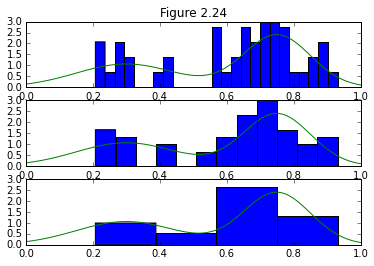

In [6]:
if __name__ == "__main__":
    x = np.linspace(0, 1, 100)

    # Set normal distribution1 
    M1 = 0.3
    S1 = 0.15
    G1 = stats.norm.pdf(x, M1, S1)

    # Set normal distribution1 
    M2 = 0.75
    S2 = 0.1
    G2 = stats.norm.pdf(x, M2, S2)

    N = 50
    Data = [mix_G_distribution(n) for n in range(N)]


    plt.subplot(3, 1, 1)
    plt.hist(Data, bins=1/0.04, normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.24")

    plt.subplot(3, 1, 2)
    plt.hist(Data, bins=1/0.08, normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.hist(Data, bins=1/0.25, normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

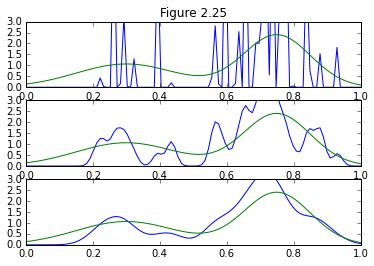

In [7]:
if __name__ == "__main__":
    #Karnel density estimation
    from scipy.stats.kde import gaussian_kde

    plt.subplot(3, 1, 1)
    plt.plot(x, gaussian_kde(Data, 0.005)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.25")

    plt.subplot(3, 1, 2)
    plt.plot(x, gaussian_kde(Data, 0.07)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.plot(x, gaussian_kde(Data, 0.2)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

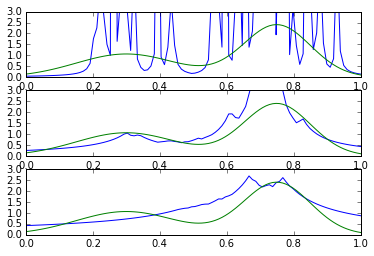

In [9]:
#k_Neighbourhood
def k_NN(test, train, k):
    train = np.array(train)
    train.sort()
    r = []
    for i in test:
        distance = abs(train - i)
        distance.sort()
        r.append(distance[(k-1)])
    r = np.array(r)
    return k / (2* r * N)



if __name__ == "__main__":
    title("Figure 2.26")
    plt.subplot(3, 1, 1)
    plt.plot(x, k_NN(x, Data, 1))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 2)
    plt.plot(x, k_NN(x, Data, 10))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.plot(x, k_NN(x, Data, 30))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer